In [2]:
# Bunch of Libraries, only a few will be used

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sma
import statsmodels as sm
import statsmodels.formula.api as smf
import urllib
import urllib.request
import requests
from random import randint
from time import sleep
from bs4 import BeautifulSoup 
from bs4 import Comment
import os

In [3]:
df = pd.read_csv('Employment_Regression.csv')

df.rename(columns={"Persons Employed in Thousands":"peit"}, inplace=True)
df.rename(columns={"Employment Cost Index":"eci"}, inplace=True)
df.rename(columns={"Average Weekly Wages":"aww"}, inplace=True)
df.rename(columns={"Jobs Openings in Thousands":"joit"}, inplace=True)
df.rename(columns={"U-Rate":"urate"}, inplace=True)
df.rename(columns={"Percent of Businesses using AI":"ai_usage"}, inplace=True)

df1 = df.iloc[:78]
df2 = df.iloc[78:]

df2

,Year,peit,eci,aww,joit,urate,ai_usage
78,2017,146610,129.475,905.04,6119.0,4.4,20.0
79,2018,148894,133.400,934.36,7109.0,3.9,40.0
80,2019,150905,137.350,963.13,7154.0,3.7,58.0
81,2020,142162,141.375,1014.70,6349.0,8.1,50.0
82,2021,146284,147.050,1066.10,9979.0,5.4,56.0
83,2022,152549,154.800,1115.31,11184.0,3.7,50.0
84,2023,155895,161.925,1159.40,9273.0,3.6,55.0
85,2024,157694,168.300,1201.88,7779.0,4.0,72.0
86,2025,158444,174.138,1246.64,7327.0,4.3,88.0


In [7]:
results1 = smf.ols('peit ~ eci + aww + joit + urate', data=df).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peit   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     634.1
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           1.20e-15
Time:                        09:50:17   Log-Likelihood:                -149.96
No. Observations:                  19   AIC:                             309.9
Df Residuals:                      14   BIC:                             314.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.123e+05   5133.388     21.877      0.000    1.01e+05    1.23e+05
eci          774.3488    311.388      2.487      0.026     106.489    1442.209
aww          -62.7332     41.611     -1.508      0.154    -151.979      26.513
joit          -0.1390      0.285     -0.487      0.634      -0.751       0.473
urate      -2050.7990    205.385     -9.985      0.000   -2491.307   -1610.291
==============================================================================
Omnibus:                        4.714   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                3.382
Skew:                           1.033   Prob(JB):                        0.184
Kurtosis:                       2.962   Cond. No.                     1.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
results2 = smf.ols('peit ~ eci + aww + joit + urate + ai_usage', data=df2).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   peit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1304.
Date:                Wed, 18 Feb 2026   Prob (F-statistic):           3.35e-05
Time:                        09:50:27   Log-Likelihood:                -55.329
No. Observations:                   9   AIC:                             122.7
Df Residuals:                       3   BIC:                             123.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.563e+04   5222.279     18.311      0.000     7.9e+04    1.12e+05
eci         2116.2234    294.339      7.190      0.006    1179.504    3052.942
aww         -247.1059     39.114     -6.318      0.008    -371.583    -122.629
joit           0.6681      0.219      3.056      0.055      -0.028       1.364
urate       -849.6598    241.005     -3.525      0.039   -1616.645     -82.675
ai_usage      14.3176      7.331      1.953      0.146      -9.013      37.649
==============================================================================
Omnibus:                        0.973   Durbin-Watson:                   2.489
Prob(Omnibus):                  0.615   Jarque-Bera (JB):                0.602
Skew:                          -0.025   Prob(JB):                        0.740
Kurtosis:                       1.734   Cond. No.                     6.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

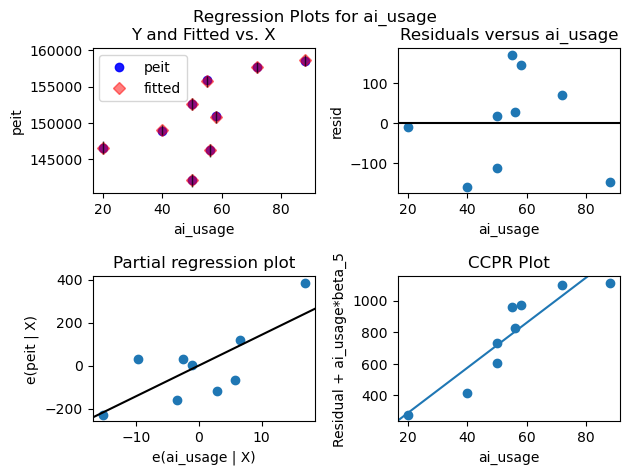

In [5]:
sma.graphics.plot_regress_exog(results1, "ai_usage")
plt.show()

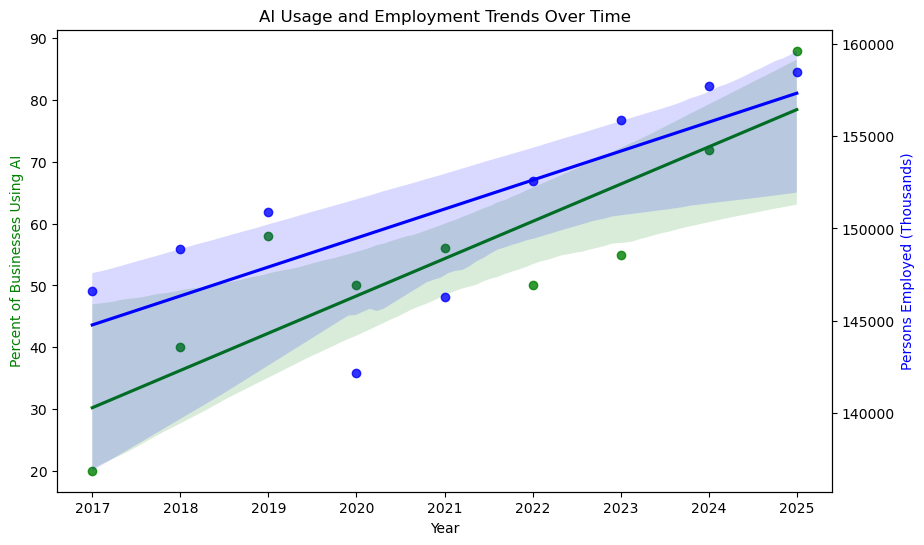

In [6]:
df2 = df2.sort_values("Year")

fig, ax1 = plt.subplots(figsize=(10,6))

# First Y-axis (AI Usage)
sns.regplot(x="Year", y="ai_usage", data=df2,
            scatter_kws={"color": "green"},
            line_kws={"color": "green"},
            ax=ax1)

ax1.set_ylabel("Percent of Businesses Using AI", color="green")
ax1.set_xlabel("Year")

# Second Y-axis (Employment)
ax2 = ax1.twinx()

sns.regplot(x="Year", y="peit", data=df2,
            scatter_kws={"color": "blue"},
            line_kws={"color": "blue"},
            ax=ax2)

ax2.set_ylabel("Persons Employed (Thousands)", color="blue")

plt.title("AI Usage and Employment Trends Over Time")
plt.show()
